In [273]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder

In [51]:
codsoft_1 = pd.read_csv("E:\\MSC Python\\Titanic-Dataset.csv")
codsoft_1

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


Data Preprocessing
-----------------

In [53]:
missing_values = codsoft_1.isnull().sum()
# Display columns with missing values
print("Missing Values in Each Column:")
print(missing_values[missing_values > 0])

Missing Values in Each Column:
Age         177
Cabin       687
Embarked      2
dtype: int64


In [361]:
codsoft_1['Age'] = codsoft_1['Age'].fillna(codsoft_1['Age'].mean())

codsoft_cln = codsoft_1.dropna()
codsoft_cln['Age'] = codsoft_cln['Age'].astype(int)
codsoft_cln.head(5)

C:\Users\VISHWA\AppData\Local\Temp\ipykernel_2664\3444086826.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codsoft_cln['Age'] = codsoft_cln['Age'].astype(int)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,age_group
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,old_aged
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,middle_aged
6,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S,old_aged
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S,teen_aged
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S,old_aged


In [236]:
codsoft_cln.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000,202.000000
mean,455.495050,0.663366,1.198020,35.034653,0.445545,0.440594,76.103301
std,249.704228,0.473732,0.528205,15.022828,0.630490,0.732294,74.759941
min,2.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,263.250000,0.000000,1.000000,25.000000,0.000000,0.000000,28.959375
50%,457.500000,1.000000,1.000000,33.500000,0.000000,0.000000,55.000000
75%,681.500000,1.000000,1.000000,46.750000,1.000000,1.000000,89.776050
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


In [238]:
codsoft_cln.info()

<class 'pandas.core.frame.DataFrame'>
Index: 202 entries, 1 to 889
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  202 non-null    int64  
 1   Survived     202 non-null    int64  
 2   Pclass       202 non-null    int64  
 3   Name         202 non-null    object 
 4   Sex          202 non-null    object 
 5   Age          202 non-null    int32  
 6   SibSp        202 non-null    int64  
 7   Parch        202 non-null    int64  
 8   Ticket       202 non-null    object 
 9   Fare         202 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     202 non-null    object 
 12  age_group    202 non-null    object 
dtypes: float64(1), int32(1), int64(5), object(6)
memory usage: 21.3+ KB


In [129]:
# Check the shape of the dataset before and after removing missing values
print("Original Dataset Shape:", codsoft_1.shape)
print("Cleaned Dataset Shape:", codsoft_cln.shape)

Original Dataset Shape: (891, 12)
Cleaned Dataset Shape: (202, 12)


In [131]:
# Check for remaining missing values
print("Remaining Missing Values:")
print(data_cleaned.isnull().sum())

# Save the filled dataset if needed
codsoft_cln.to_csv('filled_dataset.csv', index=False)

Remaining Missing Values:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


Correlation
-----------

In [340]:
print(codsoft_cln.corr(numeric_only=True))

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.111985 -0.084147  0.000877  0.029336 -0.081137   
Survived        0.111985  1.000000 -0.030513 -0.545297 -0.230443  0.138202   
Pclass         -0.084147 -0.030513  1.000000 -0.060014 -0.287396 -0.086972   
Sex             0.000877 -0.545297 -0.060014  1.000000  0.165661 -0.152552   
Age             0.029336 -0.230443 -0.287396  0.165661  1.000000 -0.138206   
SibSp          -0.081137  0.138202 -0.086972 -0.152552 -0.138206  1.000000   
Parch          -0.064538  0.042456  0.056288 -0.110574 -0.245151  0.262348   
Fare            0.017465  0.128261 -0.311740 -0.137185 -0.074994  0.291777   
Embarked        0.031825 -0.130910  0.170303  0.096805 -0.091671  0.002228   

                Parch      Fare  Embarked  
PassengerId -0.064538  0.017465  0.031825  
Survived     0.042456  0.128261 -0.130910  
Pclass       0.056288 -0.311740  0.170303  
Sex         -0.110574 -0.137185  0.096805  

Heatmap
------

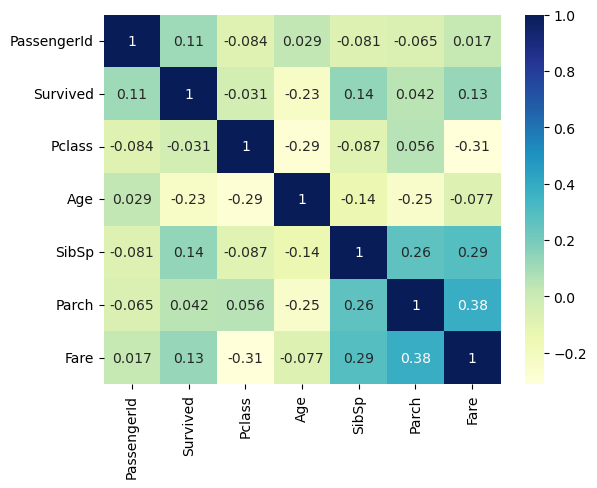

In [137]:
dataplot = sns.heatmap(codsoft_cln.corr(numeric_only=True), cmap="YlGnBu", annot=True)

# Displaying heatmap
plt.show()

Adding a new column 
-------------------
Based on dividing the Age column into Three group

In [167]:
conditions = [
    (codsoft_cln['Age'] >= 0) & (codsoft_cln['Age'] <= 19),
    (codsoft_cln['Age'] >= 20) & (codsoft_cln['Age'] <= 35),
    (codsoft_cln['Age'] >= 36)
]

age_groups = ['teen_aged', 'middle_aged', 'old_aged']
codsoft_cln['age_group'] = np.select(conditions, age_groups, default='Unknown')

C:\Users\VISHWA\AppData\Local\Temp\ipykernel_2664\1724608563.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codsoft_cln['age_group'] = np.select(conditions, age_groups, default='Unknown')


In [173]:
survival_counts = codsoft_cln['Survived'].value_counts()

# Display the results
print(f"Number of people who survived: {survival_counts.get(1, 0)}")
print(f"Number of people who died: {survival_counts.get(0, 0)}")

Number of people who survived: 134
Number of people who died: 68


In [185]:
age_group_survival_counts = codsoft_cln.groupby(['age_group', 'Survived']).size().unstack(fill_value=0)
print("\nSurvival and death counts by age group:")
print(age_group_survival_counts)


Survival and death counts by age group:
Survived      0   1
age_group          
middle_aged  21  59
old_aged     41  52
teen_aged     6  23


Bar plot showing how many died and survived by the age group
-

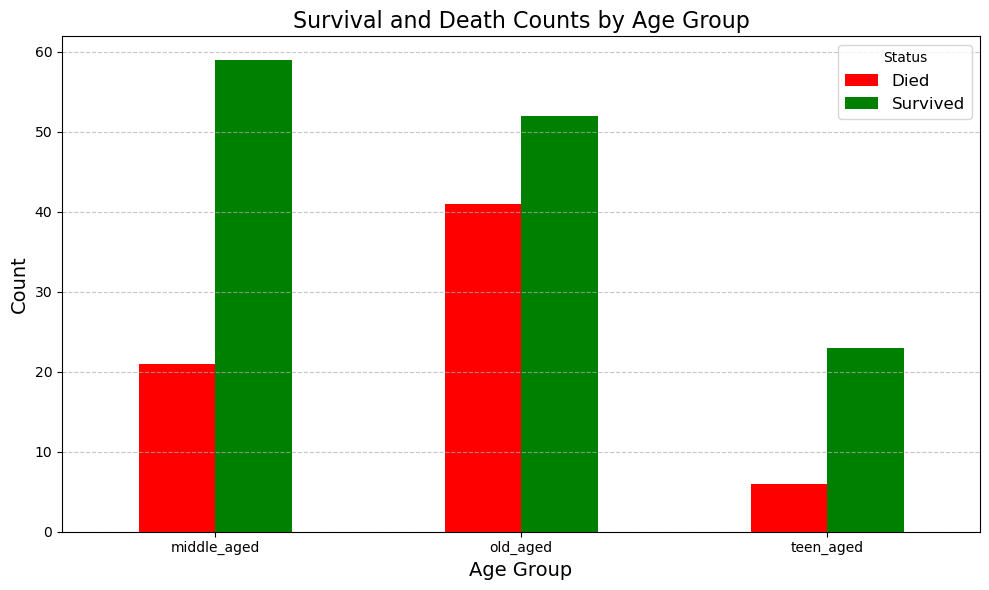

In [200]:
age_group_survival_counts = codsoft_cln.groupby(['age_group', 'Survived']).size().unstack(fill_value=0)

# Plotting the data
age_group_survival_counts.columns = ['Died', 'Survived']  # Rename columns for better readability
age_group_survival_counts.plot(kind='bar', figsize=(10, 6), color=['red', 'green'])

# Add labels and title
plt.title('Survival and Death Counts by Age Group', fontsize=16)
plt.xlabel('Age Group', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=0)
plt.legend(title='Status', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

Count of Death and Survived in Gender
-

In [247]:
sex_survival_counts = codsoft_cln.groupby(['Sex', 'Survived']).size().unstack(fill_value=0)

# Rename columns for clarity
sex_survival_counts.columns = ['Died', 'Survived']

# Display the results
print(sex_survival_counts)

        Died  Survived
Sex                   
female     6        89
male      62        45


Bar plot to show count of Male and Female Survived
-

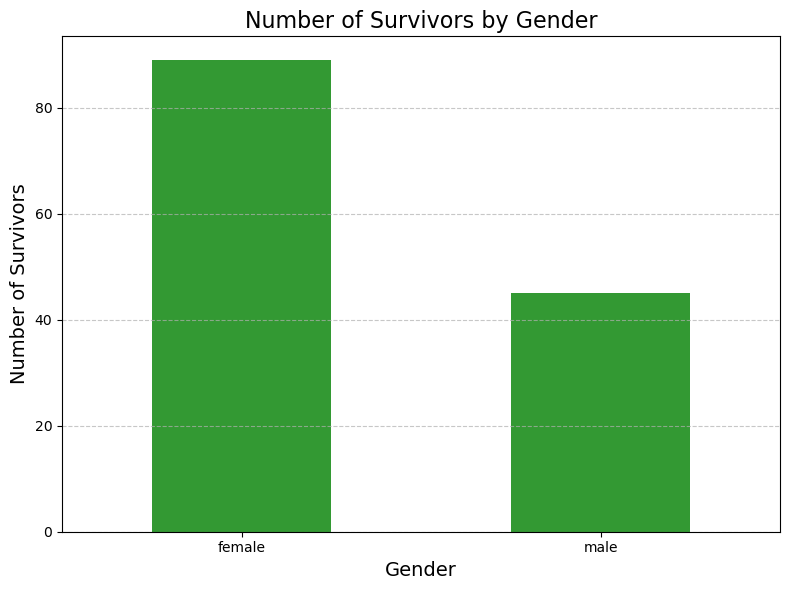

In [253]:
sex_survival_counts['Survived'].plot(kind='bar', figsize=(8, 6), color='green', alpha=0.8)

# Add labels and title
plt.title('Number of Survivors by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Number of Survivors', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()

LabelEncoder 
-
It change categorical values into numerical values

In [283]:
# Encode categorical variables
label_encoder = LabelEncoder()
codsoft_cln['Sex'] = label_encoder.fit_transform(codsoft_cln['Sex'])  # male=1, female=0
codsoft_cln['Embarked'] = label_encoder.fit_transform(codsoft_cln['Embarked'])

C:\Users\VISHWA\AppData\Local\Temp\ipykernel_2664\2122873568.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codsoft_cln['Sex'] = label_encoder.fit_transform(codsoft_cln['Sex'])  # male=1, female=0
C:\Users\VISHWA\AppData\Local\Temp\ipykernel_2664\2122873568.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  codsoft_cln['Embarked'] = label_encoder.fit_transform(codsoft_cln['Embarked'])


Classifying Features and Targer variable for model
-

In [285]:
# Select features and target variable
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
target = 'Survived'
X = codsoft_cln[features]
y = codsoft_cln[target]

Splitting Train and Test data
-

In [287]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

RandomForest Model
-

In [358]:
# Train a Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [354]:
# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

Accuracy and classification Report
--

In [297]:
# Evaluate the Random Forest model
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_report = classification_report(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"Accuracy: {rf_accuracy:.2f}")
print("Classification Report:")
print(rf_report)

Random Forest Results:
Accuracy: 0.76
Classification Report:
              precision    recall  f1-score   support

           0       0.43      0.75      0.55         8
           1       0.93      0.76      0.83        33

    accuracy                           0.76        41
   macro avg       0.68      0.75      0.69        41
weighted avg       0.83      0.76      0.78        41

